In [2]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  #Normalizar los datos
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
 df_h = pd.read_csv('../data/heart.csv')

In [6]:
df_h.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df_features = df_h.drop(['target'], axis = 1)
df_target = df_h['target']

### Para PCA siempre se tiene que normalizar los datos

In [8]:
df_features = StandardScaler().fit_transform(df_features)

Dividir la dat engtre emtrenamiento y test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=0)

In [10]:
print(X_train.size)
print(X_test.size)

9321
4004


In [16]:
X_train.shape

(717, 13)

# Modelo

In [27]:
pca = PCA(n_components=3)
pca.fit(X_train)

PCA(n_components=3)

Para comparar el desempeño de PCA y IncremetalPCA 

In [22]:
ipca = IncrementalPCA(n_components=3, batch_size=10) #El batch size son la cantidad de bloques en la que voy a dividir el procesamiento
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

Crear un plot para ver la importancia de cada dimención

In [12]:
pca.explained_variance_

array([2.65723049, 1.50721256, 1.20924863])

In [42]:
pca.explained_variance_ratio_ # La importancia de cada dimensión

array([0.20613089, 0.11691988, 0.09380575])

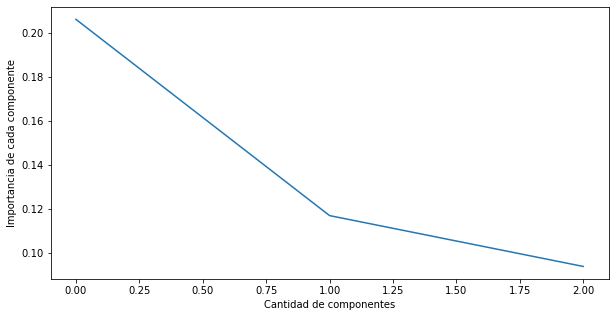

In [45]:
plt.figure(figsize=(10,5))
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Importancia de cada componente')
plt.show()

## Para el modelo con PCA

In [28]:
df_train = pca.transform(X_train)
df_test = pca.transform(X_test)

In [29]:
df_train.shape

(717, 3)

In [71]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(df_train,y_train)

print('Accurracy PCA:',logistic.score(df_test,y_test))

Accurracy PCA: 0.8311688311688312


## Para el modelo con IPCA

In [68]:
df_train_ipca = ipca.transform(X_train)
df_test_ipca  = ipca.transform(X_test)

In [70]:
logistic_ipca = LogisticRegression(solver='lbfgs')
logistic_ipca.fit(df_train_ipca,y_train)

print('Accurracy PCA:',logistic_ipca.score(df_test_ipca,y_test))

Accurracy PCA: 0.8311688311688312


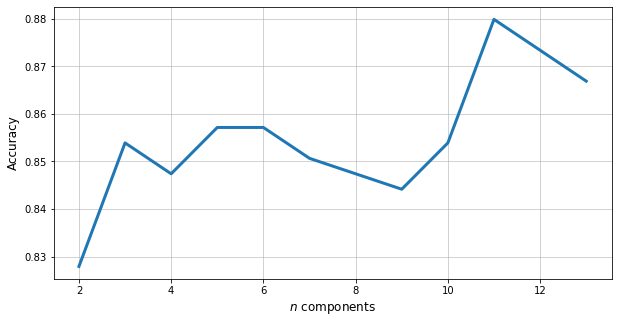

In [101]:
list_pca = []
plt.figure(figsize=(10,5))

for i in range(2,14):
    
    pca = PCA(n_components=i)
    pca.fit(X_train)
    df_train = pca.transform(X_train)
    df_test  = pca.transform(X_test)
    
    #logistc
    logistic = LogisticRegression(solver='lbfgs')
    logistic.fit(df_train,y_train)
    
    #plot
    #plt.scatter(
    #len(pca.explained_variance_),
    #logistic.score(df_test,y_test)
    #)
    
    list_pca.append(logistic.score(df_test,y_test))

    
plt.plot(
    range(2,14),
    list_pca,
    lw = 3
    )
plt.xlabel('$n$ components', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.grid(alpha = 0.7)
    
plt.show()

## Para el modelo con Kernel PCA

In [10]:
kpca = KernelPCA(n_components=3, kernel='poly') #Hay diversos tipo de kernels, en este caso utilicé el polinimico
kpca.fit(X_train)

KernelPCA(kernel='poly', n_components=3)

In [12]:
# Reduzco las dimensiones de los data sets
df_train_k = kpca.transform(X_train)
df_test_k = kpca.transform(X_test)

In [13]:
# Aplico la regresión lineal
lr = LogisticRegression()
lr.fit(df_train_k,y_train)

# Mido el modelo
accuracy = lr.score(df_test_k,y_test)
print('Accuracy :',accuracy)

Accuracy : 0.8311688311688312
